In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import datetime

In [2]:
temp = pd.read_csv('IEA-CMCC-WeatherForEnergy-Temperaturedailybypop-from-2021-01-to-2021-12.csv')
temp.head()

,Country,Territory,Unit,Temperaturedailybypop,Date
0,USA,United States,C,4.954037,1-2021
1,USA,United States,C,3.800378,2-2021
2,USA,United States,C,10.622267,3-2021
3,USA,United States,C,14.164582,4-2021
4,USA,United States,C,18.243158,5-2021


In [3]:
temp = temp.rename(columns={'Temperaturedailybypop':'Temperaturedailybypop (C)'})
temp = temp.drop('Unit', axis=1)
temp

,Country,Territory,Temperaturedailybypop (C),Date
0,USA,United States,4.954037,1-2021
1,USA,United States,3.800378,2-2021
2,USA,United States,10.622267,3-2021
3,USA,United States,14.164582,4-2021
4,USA,United States,18.243158,5-2021
5,USA,United States,23.818171,6-2021
6,USA,United States,24.834762,7-2021
7,USA,United States,25.007301,8-2021
8,USA,United States,21.932598,9-2021
9,USA,United States,17.319166,10-2021


In [4]:
humid = pd.read_csv('IEA-CMCC-WeatherForEnergy-RHdaily-from-2021-01-to-2021-12.csv')
humid = humid.rename(columns={'RHdaily': 'RHdaily (%)'})
humid = humid.drop('Unit', axis=1)
humid

,Country,Territory,RHdaily (%),Date
0,USA,United States,70.315939,1-2021
1,USA,United States,66.915174,2-2021
2,USA,United States,59.757107,3-2021
3,USA,United States,55.252804,4-2021
4,USA,United States,58.880468,5-2021
5,USA,United States,57.875832,6-2021
6,USA,United States,62.518326,7-2021
7,USA,United States,63.256059,8-2021
8,USA,United States,60.509766,9-2021
9,USA,United States,66.879949,10-2021


In [5]:
precip = pd.read_csv('IEA-CMCC-WeatherForEnergy-Precipitationdaily-from-2021-01-to-2021-12.csv')
precip = precip.rename(columns={'Precipitationdaily': 'Precipitationdaily (mm/h)'})
precip = precip.drop('Unit', axis=1)
precip.head()

,Country,Territory,Precipitationdaily (mm/h),Date
0,USA,United States,0.086839,1-2021
1,USA,United States,0.089872,2-2021
2,USA,United States,0.095176,3-2021
3,USA,United States,0.082930,4-2021
4,USA,United States,0.106700,5-2021


In [6]:
weather = pd.concat([temp, precip['Precipitationdaily (mm/h)'], humid['RHdaily (%)']], axis=1)
weather = weather[['Country', 'Territory', 'Temperaturedailybypop (C)',
             'Precipitationdaily (mm/h)', 'RHdaily (%)', 'Date']]
weather

,Country,Territory,Temperaturedailybypop (C),Precipitationdaily (mm/h),RHdaily (%),Date
0,USA,United States,4.954037,0.086839,70.315939,1-2021
1,USA,United States,3.800378,0.089872,66.915174,2-2021
2,USA,United States,10.622267,0.095176,59.757107,3-2021
3,USA,United States,14.164582,0.082930,55.252804,4-2021
4,USA,United States,18.243158,0.106700,58.880468,5-2021
5,USA,United States,23.818171,0.107739,57.875832,6-2021
6,USA,United States,24.834762,0.116892,62.518326,7-2021
7,USA,United States,25.007301,0.117813,63.256059,8-2021
8,USA,United States,21.932598,0.097820,60.509766,9-2021
9,USA,United States,17.319166,0.117818,66.879949,10-2021


In [8]:
weather['Date'] = pd.to_datetime(weather['Date'], format='%m-%Y')
weather

,Country,Territory,Temperaturedailybypop (C),Precipitationdaily (mm/h),RHdaily (%),Date
0,USA,United States,4.954037,0.086839,70.315939,2021-01-01
1,USA,United States,3.800378,0.089872,66.915174,2021-02-01
2,USA,United States,10.622267,0.095176,59.757107,2021-03-01
3,USA,United States,14.164582,0.082930,55.252804,2021-04-01
4,USA,United States,18.243158,0.106700,58.880468,2021-05-01
5,USA,United States,23.818171,0.107739,57.875832,2021-06-01
6,USA,United States,24.834762,0.116892,62.518326,2021-07-01
7,USA,United States,25.007301,0.117813,63.256059,2021-08-01
8,USA,United States,21.932598,0.097820,60.509766,2021-09-01
9,USA,United States,17.319166,0.117818,66.879949,2021-10-01


In [9]:
weather['Date'][5].month

6

In [10]:
electricity_generation = pd.read_csv('ElectricityGenerationEIA.csv')
electricity_generation[electricity_generation['Column_Order'] == 13]

,MSN,YYYYMM,Value,Column_Order,Description,Unit
8160,ELETPUS,194913,296124.289,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8161,ELETPUS,195013,334087.601,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8162,ELETPUS,195113,375298.355,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8163,ELETPUS,195213,403829.413,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8164,ELETPUS,195313,447048.563,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
...,...,...,...,...,...,...
8835,ELETPUS,202302,310200.688,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8836,ELETPUS,202303,329856.168,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8837,ELETPUS,202304,300343.527,13,Electricity Net Generation Total (including fr...,Million Kilowatthours
8838,ELETPUS,202305,327858.999,13,Electricity Net Generation Total (including fr...,Million Kilowatthours


In [11]:
electricity_generation['YYYYMM'] = pd.to_datetime(electricity_generation['YYYYMM'], format='%Y%m', errors='coerce')
electricity_generation = electricity_generation[(electricity_generation['YYYYMM'].apply(lambda x: x.year == 2021)) 
                       & (electricity_generation['Column_Order'] == 13)]
electricity_generation = electricity_generation.reset_index(drop = True)
electricity_generation = electricity_generation.rename(columns={'Value': 'Electricity Generation (Million kWh)'})
electricity_generation = electricity_generation.drop(['Unit', 'Column_Order', 'MSN'], axis=1)
electricity_generation

,YYYYMM,Electricity Generation (Million kWh),Description
0,2021-01-01,349209.709,Electricity Net Generation Total (including fr...
1,2021-02-01,323899.529,Electricity Net Generation Total (including fr...
2,2021-03-01,311397.276,Electricity Net Generation Total (including fr...
3,2021-04-01,293307.944,Electricity Net Generation Total (including fr...
4,2021-05-01,320180.962,Electricity Net Generation Total (including fr...
5,2021-06-01,373856.478,Electricity Net Generation Total (including fr...
6,2021-07-01,405624.091,Electricity Net Generation Total (including fr...
7,2021-08-01,412864.768,Electricity Net Generation Total (including fr...
8,2021-09-01,347743.775,Electricity Net Generation Total (including fr...
9,2021-10-01,320201.778,Electricity Net Generation Total (including fr...


In [12]:
electricity_capacity = pd.read_csv('ElectricityCapacityEIA.csv')
electricity_capacity

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLGBPUS,194913,Not Available,1,"Coal, Net Summer Capacity",Million Kilowatts
1,CLGBPUS,195013,Not Available,1,"Coal, Net Summer Capacity",Million Kilowatts
2,CLGBPUS,195113,Not Available,1,"Coal, Net Summer Capacity",Million Kilowatts
3,CLGBPUS,195213,Not Available,1,"Coal, Net Summer Capacity",Million Kilowatts
4,CLGBPUS,195313,Not Available,1,"Coal, Net Summer Capacity",Million Kilowatts
...,...,...,...,...,...,...
10195,ELGBPUS,202302,1164.396,15,"Total Electric, Net Summer Capacity",Million Kilowatts
10196,ELGBPUS,202303,1165.468,15,"Total Electric, Net Summer Capacity",Million Kilowatts
10197,ELGBPUS,202304,1167.116,15,"Total Electric, Net Summer Capacity",Million Kilowatts
10198,ELGBPUS,202305,1167.021,15,"Total Electric, Net Summer Capacity",Million Kilowatts


In [13]:
electricity_capacity['YYYYMM'] = pd.to_datetime(electricity_capacity['YYYYMM'], format='%Y%m', errors='coerce')
electricity_capacity = electricity_capacity[(electricity_capacity['YYYYMM'].apply(lambda x: x.year == 2021)) 
                       & (electricity_capacity['Column_Order'] == 15)]
electricity_capacity = electricity_capacity.reset_index(drop = True)
electricity_capacity = electricity_capacity.rename(columns={'Value': 'Electricity Summer Capacity (Million kW)'})
electricity_capacity = electricity_capacity.drop(['Unit', 'Column_Order', 'MSN'], axis=1)
electricity_capacity

,YYYYMM,Electricity Summer Capacity (Million kW),Description
0,2021-01-01,1117.108,"Total Electric, Net Summer Capacity"
1,2021-02-01,1118.755,"Total Electric, Net Summer Capacity"
2,2021-03-01,1121.073,"Total Electric, Net Summer Capacity"
3,2021-04-01,1121.514,"Total Electric, Net Summer Capacity"
4,2021-05-01,1123.484,"Total Electric, Net Summer Capacity"
5,2021-06-01,1125.215,"Total Electric, Net Summer Capacity"
6,2021-07-01,1128.533,"Total Electric, Net Summer Capacity"
7,2021-08-01,1131.099,"Total Electric, Net Summer Capacity"
8,2021-09-01,1132.492,"Total Electric, Net Summer Capacity"
9,2021-10-01,1135.583,"Total Electric, Net Summer Capacity"


In [14]:
electricity_capacity['Electricity Summer Capacity (Million kW)'] = electricity_capacity['Electricity Summer Capacity (Million kW)'].apply(lambda a: float(a))
electricity_generation['Electricity Generation (Million kWh)'] = electricity_generation['Electricity Generation (Million kWh)'].apply(lambda a: float(a))
electricity_capacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   YYYYMM                                    12 non-null     datetime64[ns]
 1   Electricity Summer Capacity (Million kW)  12 non-null     float64       
 2   Description                               12 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 416.0+ bytes


In [15]:
average_price = pd.read_excel('AveMonthlyPriceEIA.xlsx')
average_price

,Table 5.3. Average Price of Electricity to Ultimate Customers:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"Total by End-Use Sector, 2013 - July 2023 (Cen...",NaN,NaN,NaN,NaN,NaN
1,Period,Residential,Commercial,Industrial,Transportation,All Sectors
2,Annual Totals,NaN,NaN,NaN,NaN,NaN
3,2013,12.13,10.26,6.89,10.55,10.07
4,2014,12.52,10.74,7.1,10.45,10.44
5,2015,12.65,10.64,6.91,10.09,10.41
6,2016,12.55,10.43,6.76,9.63,10.27
7,2017,12.89,10.66,6.88,9.68,10.48
8,2018,12.87,10.67,6.92,9.7,10.53
9,2019,13.01,10.68,6.81,9.66,10.54


In [16]:
average_price.columns = ['Period', 'Residential Avg Price', 'Commercial Avg Price', 'Industrial Avg Price',
                         'Transportation Avg Price','All Sectors Avg Price (Cents/kWh)']
average_price = average_price[14:26]
average_price = average_price.reset_index(drop=True)
average_price

,Period,Residential Avg Price,Commercial Avg Price,Industrial Avg Price,Transportation Avg Price,All Sectors Avg Price (Cents/kWh)
0,January,12.62,10.27,6.32,9.48,10.29
1,February,13.01,11.36,7.75,9.92,11.16
2,March,13.24,11.08,6.98,9.7,10.84
3,April,13.73,10.87,6.7,10.03,10.63
4,May,13.86,10.86,6.65,10.03,10.69
5,June,13.83,11.33,7.22,10.42,11.25
6,July,13.83,11.46,7.42,10.29,11.45
7,August,13.92,11.52,7.54,10.27,11.55
8,Sept,14.14,11.65,7.61,11.15,11.59
9,October,14.06,11.52,7.44,10.25,11.24


In [17]:
average_price['Period'].iloc[8] = 'September'
average_price['Period']

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
Name: Period, dtype: object

In [18]:
average_price['Period'] = pd.to_datetime(average_price['Period'].apply(lambda a: a + '2021'), format='%B%Y')

In [19]:
average_price

,Period,Residential Avg Price,Commercial Avg Price,Industrial Avg Price,Transportation Avg Price,All Sectors Avg Price (Cents/kWh)
0,2021-01-01,12.62,10.27,6.32,9.48,10.29
1,2021-02-01,13.01,11.36,7.75,9.92,11.16
2,2021-03-01,13.24,11.08,6.98,9.7,10.84
3,2021-04-01,13.73,10.87,6.7,10.03,10.63
4,2021-05-01,13.86,10.86,6.65,10.03,10.69
5,2021-06-01,13.83,11.33,7.22,10.42,11.25
6,2021-07-01,13.83,11.46,7.42,10.29,11.45
7,2021-08-01,13.92,11.52,7.54,10.27,11.55
8,2021-09-01,14.14,11.65,7.61,11.15,11.59
9,2021-10-01,14.06,11.52,7.44,10.25,11.24


In [20]:
average_price['Residential Avg Price'] = average_price['Residential Avg Price'].apply(lambda a: float(a))
average_price['Commercial Avg Price'] = average_price['Commercial Avg Price'].apply(lambda a: float(a))
average_price['Industrial Avg Price'] = average_price['Industrial Avg Price'].apply(lambda a: float(a))
average_price['Transportation Avg Price'] = average_price['Transportation Avg Price'].apply(lambda a: float(a))
average_price['All Sectors Avg Price (Cents/kWh)'] = average_price['All Sectors Avg Price (Cents/kWh)'].apply(lambda a: float(a))

average_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Period                             12 non-null     datetime64[ns]
 1   Residential Avg Price              12 non-null     float64       
 2   Commercial Avg Price               12 non-null     float64       
 3   Industrial Avg Price               12 non-null     float64       
 4   Transportation Avg Price           12 non-null     float64       
 5   All Sectors Avg Price (Cents/kWh)  12 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 704.0 bytes


In [24]:
all_combined = pd.concat([weather, electricity_generation['Electricity Generation (Million kWh)'],
                          electricity_capacity['Electricity Summer Capacity (Million kW)'],
                          average_price[['Residential Avg Price', 'Commercial Avg Price', 'Industrial Avg Price',
                                         'Transportation Avg Price', 'All Sectors Avg Price (Cents/kWh)']]], axis=1)
all_combined = all_combined[['Country', 'Territory', 'Temperaturedailybypop (C)',
       'Precipitationdaily (mm/h)', 'RHdaily (%)',
       'Electricity Generation (Million kWh)',
       'Electricity Summer Capacity (Million kW)', 'Residential Avg Price',
       'Commercial Avg Price', 'Industrial Avg Price',
       'Transportation Avg Price', 'All Sectors Avg Price (Cents/kWh)','Date']].drop('Territory',axis=1)
all_combined

,Country,Temperaturedailybypop (C),Precipitationdaily (mm/h),RHdaily (%),Electricity Generation (Million kWh),Electricity Summer Capacity (Million kW),Residential Avg Price,Commercial Avg Price,Industrial Avg Price,Transportation Avg Price,All Sectors Avg Price (Cents/kWh),Date
0,USA,4.954037,0.086839,70.315939,349209.709,1117.108,12.62,10.27,6.32,9.48,10.29,2021-01-01
1,USA,3.800378,0.089872,66.915174,323899.529,1118.755,13.01,11.36,7.75,9.92,11.16,2021-02-01
2,USA,10.622267,0.095176,59.757107,311397.276,1121.073,13.24,11.08,6.98,9.70,10.84,2021-03-01
3,USA,14.164582,0.082930,55.252804,293307.944,1121.514,13.73,10.87,6.70,10.03,10.63,2021-04-01
4,USA,18.243158,0.106700,58.880468,320180.962,1123.484,13.86,10.86,6.65,10.03,10.69,2021-05-01
5,USA,23.818171,0.107739,57.875832,373856.478,1125.215,13.83,11.33,7.22,10.42,11.25,2021-06-01
6,USA,24.834762,0.116892,62.518326,405624.091,1128.533,13.83,11.46,7.42,10.29,11.45,2021-07-01
7,USA,25.007301,0.117813,63.256059,412864.768,1131.099,13.92,11.52,7.54,10.27,11.55,2021-08-01
8,USA,21.932598,0.097820,60.509766,347743.775,1132.492,14.14,11.65,7.61,11.15,11.59,2021-09-01
9,USA,17.319166,0.117818,66.879949,320201.778,1135.583,14.06,11.52,7.44,10.25,11.24,2021-10-01


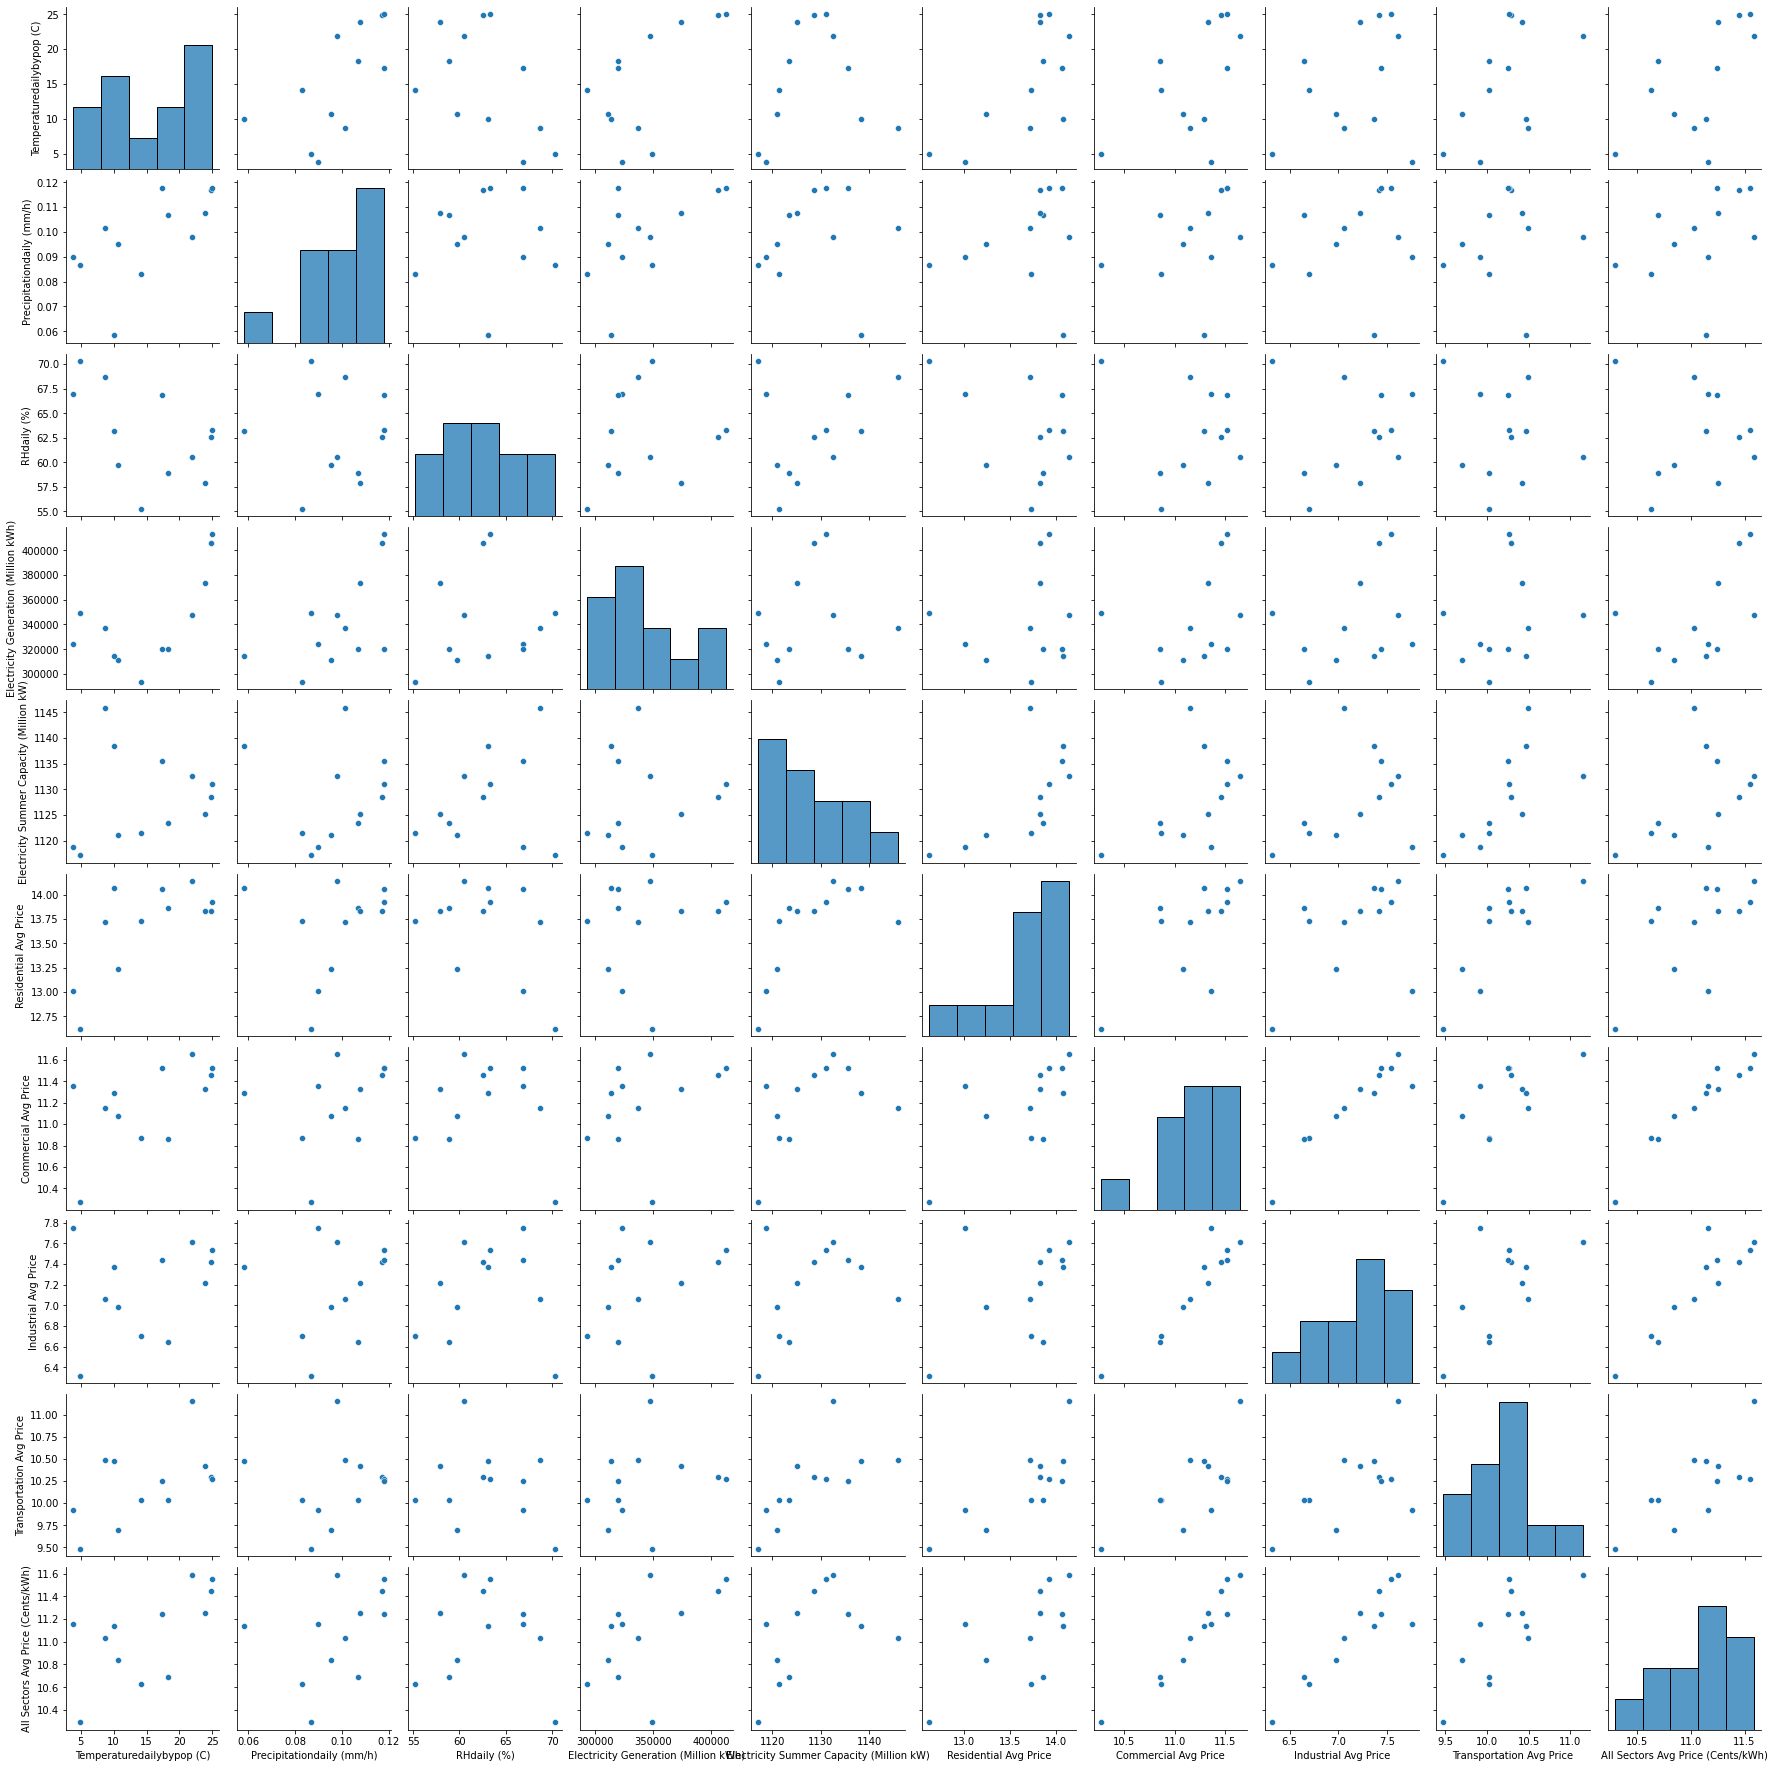

In [25]:
sns.pairplot(all_combined)

In [26]:
all_combined.corr()

/var/folders/m4/y5n2bdzx4xs3_tpc_crx0ntc0000gn/T/ipykernel_21101/1632464147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_combined.corr()


,Temperaturedailybypop (C),Precipitationdaily (mm/h),RHdaily (%),Electricity Generation (Million kWh),Electricity Summer Capacity (Million kW),Residential Avg Price,Commercial Avg Price,Industrial Avg Price,Transportation Avg Price,All Sectors Avg Price (Cents/kWh)
Temperaturedailybypop (C),1.000000,0.644566,-0.515078,0.632025,0.176259,0.701537,0.550289,0.312629,0.529142,0.628744
Precipitationdaily (mm/h),0.644566,1.000000,0.016923,0.592876,0.070453,0.229412,0.359731,0.207631,0.110970,0.406746
RHdaily (%),-0.515078,0.016923,1.000000,0.126847,0.252448,-0.430311,-0.137484,0.068218,-0.198435,-0.072790
Electricity Generation (Million kWh),0.632025,0.592876,0.126847,1.000000,0.101173,0.136053,0.340956,0.324767,0.226934,0.556219
Electricity Summer Capacity (Million kW),0.176259,0.070453,0.252448,0.101173,1.000000,0.663753,0.499025,0.378458,0.680769,0.491869
Residential Avg Price,0.701537,0.229412,-0.430311,0.136053,0.663753,1.000000,0.680652,0.439858,0.800019,0.641248
Commercial Avg Price,0.550289,0.359731,-0.137484,0.340956,0.499025,0.680652,1.000000,0.936251,0.729496,0.963554
Industrial Avg Price,0.312629,0.207631,0.068218,0.324767,0.378458,0.439858,0.936251,1.000000,0.593121,0.912899
Transportation Avg Price,0.529142,0.110970,-0.198435,0.226934,0.680769,0.800019,0.729496,0.593121,1.000000,0.753869
All Sectors Avg Price (Cents/kWh),0.628744,0.406746,-0.072790,0.556219,0.491869,0.641248,0.963554,0.912899,0.753869,1.000000
